# Parallelization Analysis

## MPI (using OpenMPI)

### Methods
Ran `shk_cloud` problem with default Riemann solver and settings with and without MPI enabled (OpenMPI and command `mpiexec` was used). Three (3) runs with 0 (control), 2, 4, and 8 "meshblocks" (domain decomposition) for two input datasets: default and double mesh resolution.

#### Configuration
```bash
$ python configure.py --prob shk_cloud -mpi
Your Athena++ distribution has now been configured with the following options:
  Problem generator:          shk_cloud
  Coordinate system:          cartesian
  Equation of state:          adiabatic
  Riemann solver:             hllc
  Magnetic fields:            OFF
  Number of scalars:          0
  Special relativity:         OFF
  General relativity:         OFF
  Frame transformations:      OFF
  Self-Gravity:               OFF
  Super-Time-Stepping:        OFF
  Shearing Box BCs:           OFF
  Debug flags:                OFF
  Code coverage flags:        OFF
  Linker flags:
  Floating-point precision:   double
  Number of ghost cells:      2
  MPI parallelism:            ON
  OpenMP parallelism:         OFF
  FFT:                        OFF
  HDF5 output:                OFF
  Compiler:                   g++
  Compilation command:        mpicxx  -O3 -std=c++11
```

### Results

In [1]:
import numpy as np

res1_ctrl = np.array([3.9218750000000000e+00, 3.6562500000000000e+00, 3.9375000000000000e+00])
res1_mb2 = np.array([2.2500000000000000e+00, 2.1875000000000000e+00, 2.2968750000000000e+00])
res1_mb4 = np.array([1.7656250000000000e+00, 1.8281250000000000e+00, 1.7812500000000000e+00])
res1_mb8 = np.array([1.3437500000000000e+00, 1.6250000000000000e+00, 1.6093750000000000e+00])
res2_ctrl = np.array([3.1000000000000000e+01, 3.0562500000000000e+01, 2.9984375000000000e+01])
res2_mb2 = np.array([1.8187500000000000e+01, 1.7781250000000000e+01, 1.9453125000000000e+01])
res2_mb4 = np.array([1.4937500000000000e+01, 1.5703125000000000e+01, 1.5968750000000000e+01])
res2_mb8 = np.array([1.1703125000000000e+01, 1.1593750000000000e+01, 1.1765625000000000e+01])

ctrl1_mean = np.mean(res1_ctrl)
r1mb2_mean = np.mean(res1_mb2)
r1mb4_mean = np.mean(res1_mb4)
r1mb8_mean = np.mean(res1_mb8)
ctrl2_mean = np.mean(res2_ctrl)
r2mb2_mean = np.mean(res2_mb2)
r2mb4_mean = np.mean(res2_mb4)
r2mb8_mean = np.mean(res2_mb8)

ctrl1_std = np.std(res1_ctrl)
r1mb2_std = np.std(res1_mb2)
r1mb4_std = np.std(res1_mb4)
r1mb8_std = np.std(res1_mb8)
ctrl2_std = np.std(res2_ctrl)
r2mb2_std = np.std(res2_mb2)
r2mb4_std = np.std(res2_mb4)
r2mb8_std = np.std(res2_mb8)

### Analysis

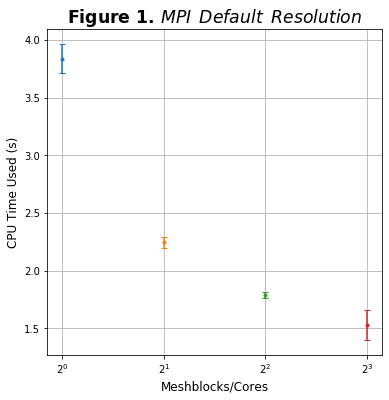

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6, 6])
plt.title('Figure 1. $MPI \hspace{.5} Default \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('Meshblocks/Cores', fontsize='large')
plt.xscale('log', basex=2)
plt.ylabel('CPU Time Used (s)', fontsize='large')
# plt.yscale('log', basey=2)
plt.errorbar(1, ctrl1_mean, ctrl1_std, marker='.', capsize=3)
plt.errorbar(2, r1mb2_mean, r1mb2_std, marker='.', capsize=3)
plt.errorbar(4, r1mb4_mean, r1mb4_std, marker='.', capsize=3)
plt.errorbar(8, r1mb8_mean, r1mb8_std, marker='.', capsize=3)
plt.grid()
plt.show()

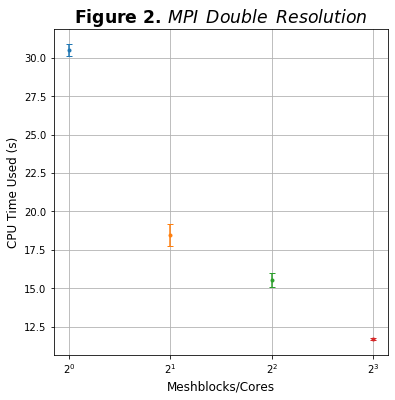

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6, 6])
plt.title('Figure 2. $MPI \hspace{.5} Double \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('Meshblocks/Cores', fontsize='large')
plt.xscale('log', basex=2)
plt.ylabel('CPU Time Used (s)', fontsize='large')
# plt.yscale('log', basey=2)
plt.errorbar(1, ctrl2_mean, ctrl2_std, marker='.', capsize=3)
plt.errorbar(2, r2mb2_mean, r2mb2_std, marker='.', capsize=3)
plt.errorbar(4, r2mb4_mean, r2mb4_std, marker='.', capsize=3)
plt.errorbar(8, r2mb8_mean, r2mb8_std, marker='.', capsize=3)
plt.grid()
plt.show()

## OpenMP

### Methods
Ran `shk_cloud` problem with default Riemann solver and settings with and without OpenMP enabled. Two sets of input files, default and double resolution, with 8 meshblocks were used. Each input file was run three (3) times.

#### Configuration

```bash
$ python configure.py --prob shk_cloud -omp
Your Athena++ distribution has now been configured with the following options:
  Problem generator:          shk_cloud
  Coordinate system:          cartesian
  Equation of state:          adiabatic
  Riemann solver:             hllc
  Magnetic fields:            OFF
  Number of scalars:          0
  Special relativity:         OFF
  General relativity:         OFF
  Frame transformations:      OFF
  Self-Gravity:               OFF
  Super-Time-Stepping:        OFF
  Shearing Box BCs:           OFF
  Debug flags:                OFF
  Code coverage flags:        OFF
  Linker flags:
  Floating-point precision:   double
  Number of ghost cells:      2
  MPI parallelism:            OFF
  OpenMP parallelism:         ON
  FFT:                        OFF
  HDF5 output:                OFF
  Compiler:                   g++
  Compilation command:        g++  -O3 -std=c++11 -fopenmp
  ```

### Results

In [4]:
import numpy as np

res1_t2 = np.array([3.5950217999925371e+00, 2.8408368999953382e+00, 3.1633646999835037e+00])
res1_t4 = np.array([3.1927750000031665e+00, 2.3553093000082299e+00, 2.2902143000101205e+00])
res1_t8 = np.array([4.5674366000166629e+00, 2.5276147999975365e+00, 2.5232322999800090e+00])
res2_t2 = np.array([2.0592181299987715e+01, 2.0718410500005120e+01, 2.2292227600002661e+01])
res2_t4 = np.array([1.8268929300014861e+01, 1.7756539499998325e+01, 1.5737772099993890e+01])
res2_t8 = np.array([2.5584745500003919e+01, 2.0182262299989816e+01, 2.1289132400008384e+01])

r1t2_mean = np.mean(res1_t2)
r1t4_mean = np.mean(res1_t4)
r1t8_mean = np.mean(res1_t8)
r2t2_mean = np.mean(res2_t2)
r2t4_mean = np.mean(res2_t4)
r2t8_mean = np.mean(res2_t8)

r1t2_std = np.std(res1_t2)
r1t4_std = np.std(res1_t4)
r1t8_std = np.std(res1_t8)
r2t2_std = np.std(res2_t2)
r2t4_std = np.std(res2_t4)
r2t8_std = np.std(res2_t8)

### Analysis

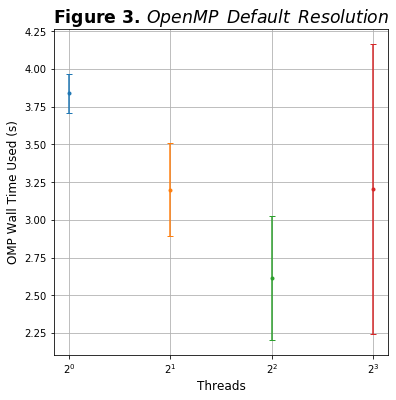

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6, 6])
plt.title('Figure 3. $OpenMP \hspace{.5} Default \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('Threads', fontsize='large')
plt.xscale('log', basex=2)
plt.ylabel('OMP Wall Time Used (s)', fontsize='large')
# plt.yscale('log', basey=2)
plt.errorbar(1, ctrl1_mean, ctrl1_std, marker='.', capsize=3)
plt.errorbar(2, r1t2_mean, r1t2_std, marker='.', capsize=3)
plt.errorbar(4, r1t4_mean, r1t4_std, marker='.', capsize=3)
plt.errorbar(8, r1t8_mean, r1t8_std, marker='.', capsize=3)
plt.grid()
plt.show()

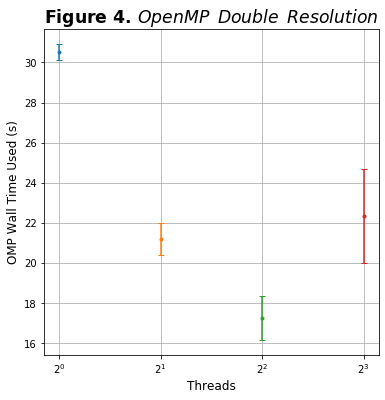

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6, 6])
plt.title('Figure 4. $OpenMP \hspace{.5} Double \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('Threads', fontsize='large')
plt.xscale('log', basex=2)
plt.ylabel('OMP Wall Time Used (s)', fontsize='large')
# plt.yscale('log', basey=2)
plt.errorbar(1, ctrl2_mean, ctrl2_std, marker='.', capsize=3)
plt.errorbar(2, r2t2_mean, r2t2_std, marker='.', capsize=3)
plt.errorbar(4, r2t4_mean, r2t4_std, marker='.', capsize=3)
plt.errorbar(8, r2t8_mean, r2t8_std, marker='.', capsize=3)
plt.grid()
plt.show()

## Hybrid

### Methods
Ran `shk_cloud` problem with default Riemann solver and settings with _both_ MPI and OpenMP enabled. Performed three (3) runs with the following input configurations:
- 4 meshblocks, 2 threads x 2 processes
- 8 meshblocks, 4x2, 2x4
- 16 meshblocks, 4x4, 2x8

However, one run of the 2x8 test took over 100 seconds, and one run of the 4x4 test took over 10 minutes; these results are not included in the analysis and plots which follow.

#### Configuration

```bash
$ python configure.py --prob shk_cloud -omp -mpi
Your Athena++ distribution has now been configured with the following options:
  Problem generator:          shk_cloud
  Coordinate system:          cartesian
  Equation of state:          adiabatic
  Riemann solver:             hllc
  Magnetic fields:            OFF
  Number of scalars:          0
  Special relativity:         OFF
  General relativity:         OFF
  Frame transformations:      OFF
  Self-Gravity:               OFF
  Super-Time-Stepping:        OFF
  Shearing Box BCs:           OFF
  Debug flags:                OFF
  Code coverage flags:        OFF
  Linker flags:
  Floating-point precision:   double
  Number of ghost cells:      2
  MPI parallelism:            ON
  OpenMP parallelism:         ON
  FFT:                        OFF
  HDF5 output:                OFF
  Compiler:                   g++
  Compilation command:        mpicxx  -O3 -std=c++11 -fopenmp
  ```

### Results

In [7]:
import numpy as np

h2x2 = np.array([1.5777296600019326e+01, 1.6312719800014747e+01, 1.6240703199990094e+01])
h2x4 = np.array([1.5784718100010650e+01, 1.7637009499972919e+01, 1.6951375600008760e+01])
h4x2 = np.array([1.8124612300016452e+01, 1.6951435900002252e+01, 1.4525779699994018e+01])

h2x2_mean = np.mean(h2x2)
h2x4_mean = np.mean(h2x4)
h4x2_mean = np.mean(h4x2)

h2x2_std = np.std(h2x2)
h2x4_std = np.std(h2x4)
h4x2_std = np.std(h4x2)

### Analysis

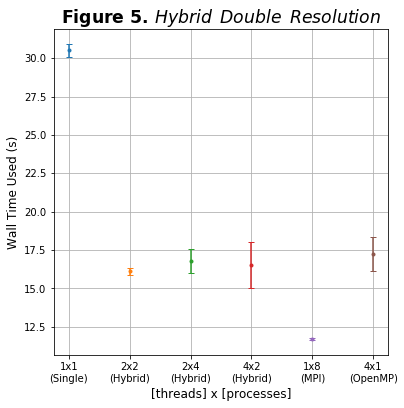

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6, 6])
plt.title('Figure 5. $Hybrid \hspace{.5} Double \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('[threads] x [processes]', fontsize='large')
plt.xticks(np.arange(6), ('1x1\n(Single)', '2x2\n(Hybrid)', '2x4\n(Hybrid)', '4x2\n(Hybrid)', '1x8\n(MPI)', '4x1\n(OpenMP)'))
plt.ylabel('Wall Time Used (s)', fontsize='large')
plt.errorbar(0, ctrl2_mean, ctrl2_std, marker='.', capsize=3)
plt.errorbar(1, h2x2_mean, h2x2_std, marker='.', capsize=3)
plt.errorbar(2, h2x4_mean, h2x4_std, marker='.', capsize=3)
plt.errorbar(3, h4x2_mean, h4x2_std, marker='.', capsize=3)
plt.errorbar(4, r2mb8_mean, r2mb8_std, marker='.', capsize=3)
plt.errorbar(5, r2t4_mean, r2t4_std, marker='.', capsize=3)
plt.grid()
plt.show()